In [152]:
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt
import copy

In [9]:
#A8.4.)
#b.)
num = 0.0513*np.array([1,2,1])
den = np.array([1, -1.386, 0.5913])
sys = signal.dlti(num, den)
print("Zeros =", sys.zeros, "and poles = ", sys.poles)

Zeros = [-1. -1.] and poles =  [0.693+0.33324315j 0.693-0.33324315j]


Text(0.5, 0, 'n')

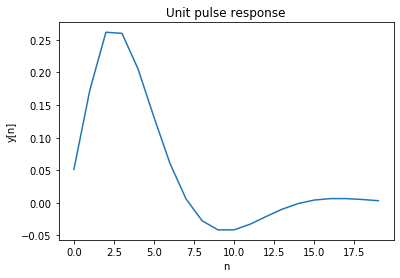

In [15]:
#c.)
t, y = signal.dimpulse(sys, n=20)
plt.plot(t, y[0])
plt.title("Unit pulse response")
plt.ylabel("y[n]")
plt.xlabel("n")
#Takes form as a damped oscillation

Text(0.5, 0, 'n')

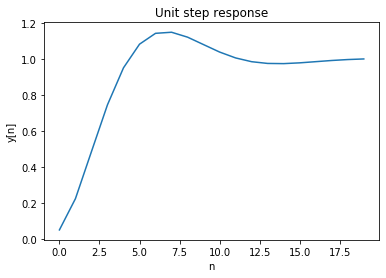

In [16]:
t, y = signal.dstep(sys, n=20)
plt.plot(t, y[0])
plt.title("Unit step response")
plt.ylabel("y[n]")
plt.xlabel("n")

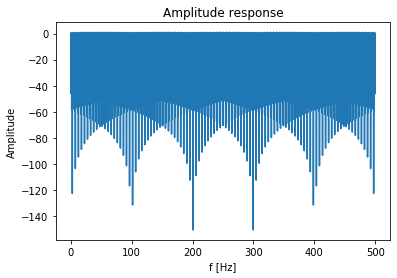

In [58]:
#d.)
omega = np.linspace(0, 1000*np.pi, 2400)
w, mag, phase = sys.bode(w = omega)
plt.figure()
plt.title("Amplitude response")
plt.ylabel("Amplitude")
plt.xlabel("f [Hz]")
plt.plot(w/(2*np.pi), mag)
#For 0, 200 and 400 Hz there seams to be a strong damping, with a factor of -100.

[0.5-0.76063883j 0.5+0.76063883j] [0.5+0.59160798j 0.5-0.59160798j] [0.]


Text(0.5, 0, 'n')

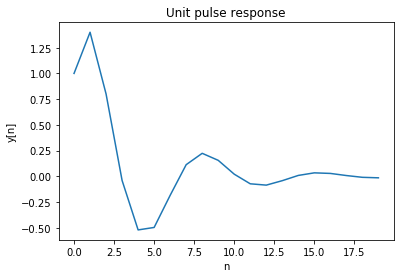

In [167]:
#A8.5.)
#a.) By inverse transform and convolution
num2 = np.array([1, 0.4])
den2 = np.array([1, -1, 0.6])
d = np.zeros(20)
d[0]=1
r, p, k = signal.residue(num2, den2)
print(r, p, k)
n = np.linspace(0,19,20)
h = r[0]*p[0]**n + r[1]*p[1]**n + k*d
#print(signal.convolve(h, d))
plt.plot(n,signal.convolve(h, d, mode = "full")[:20])
#plt.plot(n, h)
plt.title("Unit pulse response")
plt.ylabel("y[n]")
plt.xlabel("n")

Text(0.5, 0, 'n')

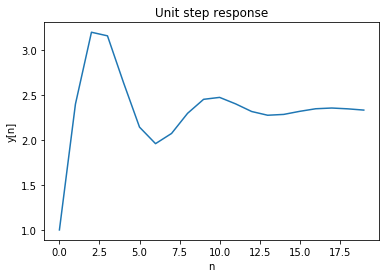

In [168]:
u = np.ones(20)
plt.plot(n,signal.convolve(h, u)[:20])
#plt.plot(n, h)
plt.title("Unit step response")
plt.ylabel("y[n]")
plt.xlabel("n")

Zeros = [-0.4  0. ] and poles =  [0.5+0.59160798j 0.5-0.59160798j]


Text(0.5, 0, 'n')

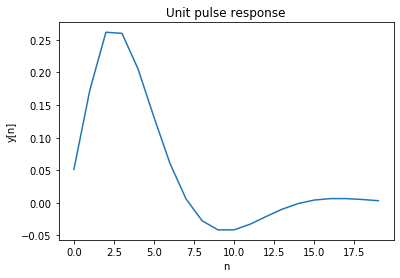

In [163]:
#d.) from built in commands
num2 = np.array([1, 0.4, 0])
den2 = np.array([1, -1, 0.6])
sys2 = signal.dlti(num2, den2)
print("Zeros =", sys2.zeros, "and poles = ", sys2.poles)

t, y = signal.dimpulse(sys, n=20)
plt.plot(t, y[0])
plt.title("Unit pulse response")
plt.ylabel("y[n]")
plt.xlabel("n")

Text(0.5, 0, 'n')

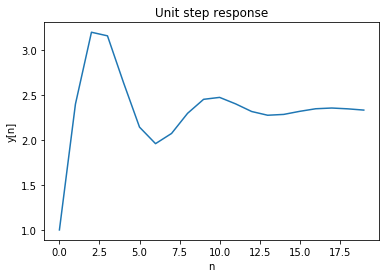

In [116]:
t, y = signal.dstep(sys2, n=20)
plt.plot(t, y[0])
plt.title("Unit step response")
plt.ylabel("y[n]")
plt.xlabel("n")

Text(0.5, 1.0, 'Unit impulse response')

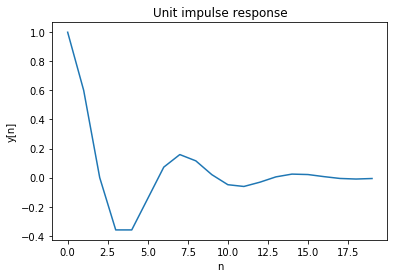

In [162]:
#b.) From difference equation

#y[n] = x[n] - 0.4*x[n-1] + y[n-1] - 0.6*y[n-2]
#Unit impulse:
y = np.zeros(20)
y[0] = 1
y[1] = y[0] -0.4
y[2] = y[1] - 0.6*y[0]
for i in range(17):
    y[3+i] = y[2+i] - 0.6*y[1+i]
plt.plot(n, y)
plt.xlabel("n")
plt.ylabel("y[n]")
plt.title("Unit impulse response")

Text(0.5, 1.0, 'Unit step response')

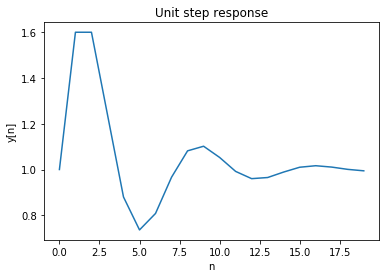

In [179]:
#y[n] = x[n] - 0.4*x[n-1] + y[n-1] - 0.6*y[n-2]
#Unit step:
y = np.zeros(20)
x = np.ones(20)
y[0] = x[0]
y[1] = x[1] - 0.4*x[0] + y[0]
y[2] = y[1] - 0.6*y[0] + x[2] - 0.4*x[1]
for i in range(17):
    y[3+i] = y[2+i] - 0.6*y[1+i] +x[3+i] - 0.4*x[2+i]
plt.plot(n, y)
plt.xlabel("n")
plt.ylabel("y[n]")
plt.title("Unit step response")

Text(0.5, 0, 'n')

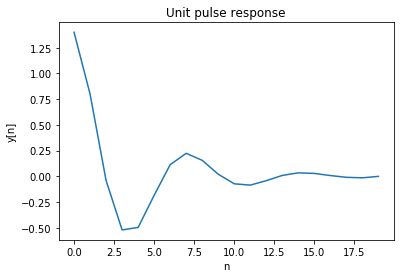

In [181]:
#c.) From long division

num2 = np.array([1, 0.4, 0])
den2 = np.array([1, -1, 0.6])
numerator = copy.copy(num2)
denominator = copy.copy(den2)
temp = copy.copy(num2)
y = np.zeros(20)
y[0] = numerator[0]/denominator[0]
temp[0] = numerator[1] - y[0]*denominator[1]
temp[1] = - y[0]*denominator[2]
numerator = temp
for i in range(19):
    y[i] = numerator[0]/denominator[0]
    temp[0] = numerator[1] - y[i]*denominator[1]
    temp[1] = -y[i]*denominator[2]
    numerator = temp
    
plt.plot(n, y)
plt.title("Unit pulse response")
plt.ylabel("y[n]")
plt.xlabel("n")

Text(0.5, 0, 'n')

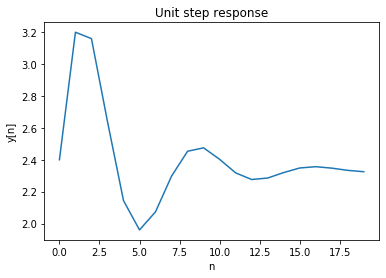

In [180]:
num2 = np.array([1, 0.4, 0, 0])
den2 = np.array([1, -2, 1.6, -0.6])
numerator = copy.copy(num2)
denominator = copy.copy(den2)
temp = copy.copy(num2)
y = np.zeros(20)
y[0] = numerator[0]/denominator[0]
temp[0] = numerator[1] - y[0]*denominator[1]
temp[1] = numerator[2]- y[0]*denominator[2]
temp[2] = - y[0]*denominator[3]
numerator = temp
for i in range(20):
    y[i] = numerator[0]/denominator[0]
    temp[0] = numerator[1] - y[i]*denominator[1]
    temp[1] = numerator[2]- y[i]*denominator[2]
    temp[2] = - y[i]*denominator[3]
    numerator = temp
    
plt.plot(n, y)
plt.title("Unit step response")
plt.ylabel("y[n]")
plt.xlabel("n")